# **Import dependencies**

In [ ]:
from google.colab import drive
import os
import glob
import ee
import geemap
import geopandas as gpd
#import geobr
import json
#import rasterio as rio
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.image as image
import imageio
import ipywidgets as widgets
from ipywidgets import HBox, Label, Layout
#from rasterio.plot import show
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
#from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.offsetbox import OffsetImage
from IPython.display import display, clear_output

In [ ]:
# Solve map not plotted problem
!pip install ipyleaflet==0.17

In [ ]:
# Authentication and project information in GEE
ee.Authenticate()
ee.Initialize(project='ee-lzfsantos')

In [ ]:
# Connect with Google Drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# **MapBiomas settings**

In [ ]:
## Adding mapbiomas data
## Defining the image collection
path_project = 'projects/mapbiomas-workspace/public/collection8/mapbiomas_collection80_integration_v1'
mapbiomas = ee.Image(path_project)
print('Dados MapBiomas',mapbiomas.bandNames().getInfo())

# Created based on : https://brasil.mapbiomas.org/wp-content/uploads/sites/4/2023/08/Legenda-Colecao-8-LEGEND-CODE.pdf
dicionario_cores = {
    1: "#32a65e",
    3: "#1f8d49",
    4: "#7dc975",
    5: "#04381d",
    6: "#026975",
    49: "#02d659",
    10: "#ad975a",
    11: "#519799",
    12: "#d6bc74",
    32: "#fc8114",
    29: "#ffaa5f",
    50: "#ad5100",
    13: "#d89f5c",
    14: "#FFFFB2",
    15: "#edde8e",
    18: "#E974ED",
    19: "#C27BA0",
    39: "#f5b3c8",
    20: "#db7093",
    40: "#c71585",
    62: "#ff69b4",
    41: "#f54ca9",
    36: "#d082de",
    46: "#d68fe2",
    47: "#9932cc",
    48: "#e6ccff",
    9: "#7a5900",
    21: "#ffefc3",
    22: "#d4271e",
    23: "#ffa07a",
    24: "#d4271e",
    30: "#9c0027",
    25: "#db4d4f",
    26: "#0000FF",
    33: "#2532e4",
    31: "#091077",
    27: "#ffffff"
}

dicionario_classes = {
    1: "Floresta",
    3: "Formação Florestal",
    4: "Formação Savânica",
    5: "Mangue",
    6: "Floresta Alagável (beta)",
    49: "Restinga Arborizada",
    10: "Formação Natural não Florestal",
    11: "Campo Alagado e Área Pantanosa",
    12: "Formação Campestre",
    32: "Apicum",
    29: "Afloramento Rochoso",
    50: "Restinga Herbácea",
    13: "Outras Formações não Florestais",
    14: "Agropecuária",
    15: "Pastagem",
    18: "Agricultura",
    19: "Lavoura Temporária",
    39: "Soja",
    20: "Cana",
    40: "Arroz",
    62: "Algodão (beta)",
    41: "Outras Lavouras Temporárias",
    36: "Lavoura Perene",
    46: "Café",
    47: "Citrus",
    48: "Outras Lavouras Perenes",
    9: "Silvicultura",
    21: "Mosaico de Usos",
    22: "Área não Vegetada",
    23: "Praia, Duna e Areal",
    24: "Área Urbanizada",
    30: "Mineração",
    25: "Outras Áreas não Vegetadas",
    26: "Corpo D'água",
    33: "Rio, Lago e Oceano",
    31: "Aquicultura",
    27: "Não observado"
}

## Pallete
paleta_nomes = {key:value for key, value in zip(dicionario_classes.values(), dicionario_cores.values())}
paleta_nomes

# Creating the color palette
paleta_cores = {
    0: "#ffffff",1: "#32a65e", 2: "#32a65e",3: "#1f8d49",
    4: "#7dc975",5: "#04381d", 6: "#026975",7: "#000000",
    8: "#000000",9: "#7a6c00", 10: "#ad975a",11: "#519799",
    12: "#d6bc74",13: "#d89f5c", 14: "#FFFFB2",15: "#edde8e",
    16: "#000000",17: "#000000", 18: "#f5b3c8",19: "#C27BA0",
    20: "#db7093",21: "#ffefc3", 22: "#db4d4f",23: "#ffa07a",
    24: "#d4271e",25: "#db4d4f", 26: "#0000FF",27: "#000000",
    28: "#000000",29: "#ffaa5f", 30: "#9c0027",31: "#091077",
    32: "#fc8114",33: "#2532e4", 34: "#93dfe6",35: "#9065d0",
    36: "#d082de",37: "#000000", 38: "#000000",39: "#f5b3c8",
    40: "#c71585",41: "#f54ca9", 42: "#cca0d4",43: "#dbd26b",
    44: "#807a40",45: "#e04cfa", 46: "#d68fe2",47: "#9932cc",
    48: "#e6ccff",49: "#02d659", 50: "#ad5100",51: "#000000",
    52: "#000000",53: "#000000", 54: "#000000",55: "#000000",
    56: "#000000",57: "#CC66FF", 58: "#FF6666",59: "#006400",
    60: "#8d9e8b",61: "#f5d5d5", 62: "#ff69b4"
}
palette_list = list(paleta_cores.values())
len(palette_list)

Dados MapBiomas ['classification_1985', 'classification_1986', 'classification_1987', 'classification_1988', 'classification_1989', 'classification_1990', 'classification_1991', 'classification_1992', 'classification_1993', 'classification_1994', 'classification_1995', 'classification_1996', 'classification_1997', 'classification_1998', 'classification_1999', 'classification_2000', 'classification_2001', 'classification_2002', 'classification_2003', 'classification_2004', 'classification_2005', 'classification_2006', 'classification_2007', 'classification_2008', 'classification_2009', 'classification_2010', 'classification_2011', 'classification_2012', 'classification_2013', 'classification_2014', 'classification_2015', 'classification_2016', 'classification_2017', 'classification_2018', 'classification_2019', 'classification_2020', 'classification_2021', 'classification_2022']


63

# **Defining and plot the map**



In [ ]:
# Defining and plot the map

# Defining state
state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','31'))

# Defining city
city = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_Municipios_2022').filter(ee.Filter.eq('CD_MUN','3110103'))

# Defining farm
#malha_fundiaria_pedra_dourada_mg = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_se_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',3851328))
farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_se_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',3851328))

# Mapbiomas layer
#map_1985 = mapbiomas.select('classification_1985')
map_2021 = mapbiomas.select('classification_2021')

global mapbiomas_clip
mapbiomas_clip = map_2021.clip(farm)
Map = geemap.Map()
Map.addLayer(state, {}, "State")
Map.addLayer(city, {}, "City")
Map.addLayer(mapbiomas_clip, {'palette':palette_list, 'min':0, 'max':62},'Farm (MapBiomas)')
Map.centerObject(farm,10)
Map


Map(center=[-20.72614763169431, -41.902187629793715], controls=(WidgetControl(options=['position', 'transparen…

In [ ]:
#from ipywidgets import *


all_farms_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/files/data_integration_all_farms.csv")
# Loading states
list_state = list(set(all_farms_df['state_name']))
state_name = widgets.Dropdown(options= sorted(list_state), description='State:', disabled=False,)
value_temp = all_farms_df['state_name']==state_name.value
df_state_temp = all_farms_df[value_temp]

# Loading cities
list_city = list(set(df_state_temp['city_name']))
city_name = widgets.Dropdown(options= sorted(list_city), description='City:', disabled=False,)
value_temp = df_state_temp['city_name']==city_name.value
df_city_temp = df_state_temp[value_temp]

# Loading farms
list_farm = list(set(df_city_temp['farm']))
farm_name = widgets.Dropdown(options= sorted(list_farm), description='Farm:', disabled=False,)

#valor = all_farms_mata_atlantica_df['total_area_size'][farm_name]
#state_name = cities_df["Nome_UF"][city_cod]

farm_area = widgets.FloatText(value=.0, description='Area:', disabled=False)
biome_name = widgets.Text(value='', description='Biome:', disabled=False)
climate_name = widgets.Text(value='', description='Climate:', disabled=False)
year_number = widgets.Text(value='', description='Year:', disabled=False)
balance_farm = widgets.FloatText(value=0.0, description='CO2 (LUC):', disabled=False)
balance_farm_ha = widgets.FloatText(value=0.0, description='CO2/ha:', disabled=False)

space1 = widgets.Label(value='')
space2 = widgets.Label(value='')
space3 = widgets.Label(value='')
space4 = widgets.Label(value='')
space5 = widgets.Label(value='')
space6 = widgets.Label(value='')
space7 = widgets.Label(value='')
space8 = widgets.Label(value='')
space9 = widgets.Label(value='')

#@debounce(0.2)
def value_changed_state(change):
    value_temp = all_farms_df['state_name']==change.new
    df_state_temp = all_farms_df[value_temp]
    list_city = list(set(df_state_temp['city_name']))
    city_name.options=sorted(list_city)
state_name.observe(value_changed_state, 'value')

def value_changed_city(change):
    value_temp = all_farms_df['city_name']==change.new
    df_city_temp = all_farms_df[value_temp]
    list_farm = list(set(df_city_temp['farm']))
    farm_name.options=sorted(list_farm)
city_name.observe(value_changed_city, 'value')

def value_changed_farm(change):
    farm = all_farms_df.index[all_farms_df['farm'] == change.new].tolist()
    farm_area.value =  all_farms_df['total_area_size'][farm]
    biome = all_farms_df['biome_name'][farm].tolist()
    biome_name.value = biome[0]
    climate = all_farms_df['climate_name'][farm].tolist()
    climate_name.value = climate[0]
    year_number.value = '2021'
    balance_farm.value =  all_farms_df['balance_CO2_farm'][farm]
    balance_farm_ha.value =  all_farms_df['balance_CO2_farm_ha'][farm]
    global city_cod
    city_cod = all_farms_df['city_cod'][farm].tolist()
    global farm_cod
    farm_cod = farm_name.value

    #============================================================================================
    # Updating map variables
    # Defining state
    match state_name.value:
      case ('Ceará'):
        state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','23'))
      case ('Goiás'):
        state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','52'))
      case ('Mato Grosso'):
        state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','51'))
      case ('Mato Grosso do Sul'):
        state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','50'))
      case ('Minas Gerais'):
        state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','31'))
      case ('Rio Grande do Sul'):
        state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','43'))
      case ('Rondônia'):
        state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','11'))

    # Defining city
    city_cod = city_cod[0]
    city = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_Municipios_2022').filter(ee.Filter.eq('CD_MUN',str(city_cod)))

    # Defining farm
    match state_name.value:
      case ('Ceará'):
        farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_se_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
      case ('Goiás'):
        farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_co_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
      case ('Mato Grosso'):
        farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_co_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
      case ('Mato Grosso do Sul'):
        farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_co_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
      case ('Minas Gerais'):
        farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_se_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
      case ('Rio Grande do Sul'):
        farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_s_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
      case ('Rondônia'):
        farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_n_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))

    # Mapbiomas layer
    map_2021 = mapbiomas.select('classification_2021')
    mapbiomas_clip = map_2021.clip(farm)
    Map = geemap.Map()
    Map.addLayer(state, {}, "State")
    Map.addLayer(city, {}, "City")
    Map.addLayer(mapbiomas_clip, {'palette':palette_list, 'min':0, 'max':62},'Farm (MapBiomas)')
    Map.centerObject(farm,10)
    #Obs.: To update the map you need to execute the next function block
    #==================================================================================================
farm_name.observe(value_changed_farm, 'value')

items = [state_name, space1,city_name,space2,farm_name, space3, farm_area, space4, biome_name, space5, climate_name, space6, year_number, space7, balance_farm, space8, balance_farm_ha, space9 ]
widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(6, 150px)"))

GridBox(children=(Dropdown(description='State:', options=('Ceará', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul…

In [ ]:
Map

Map(bottom=2344939.0, center=[-20.77144276762192, -42.24067211151123], controls=(WidgetControl(options=['posit…

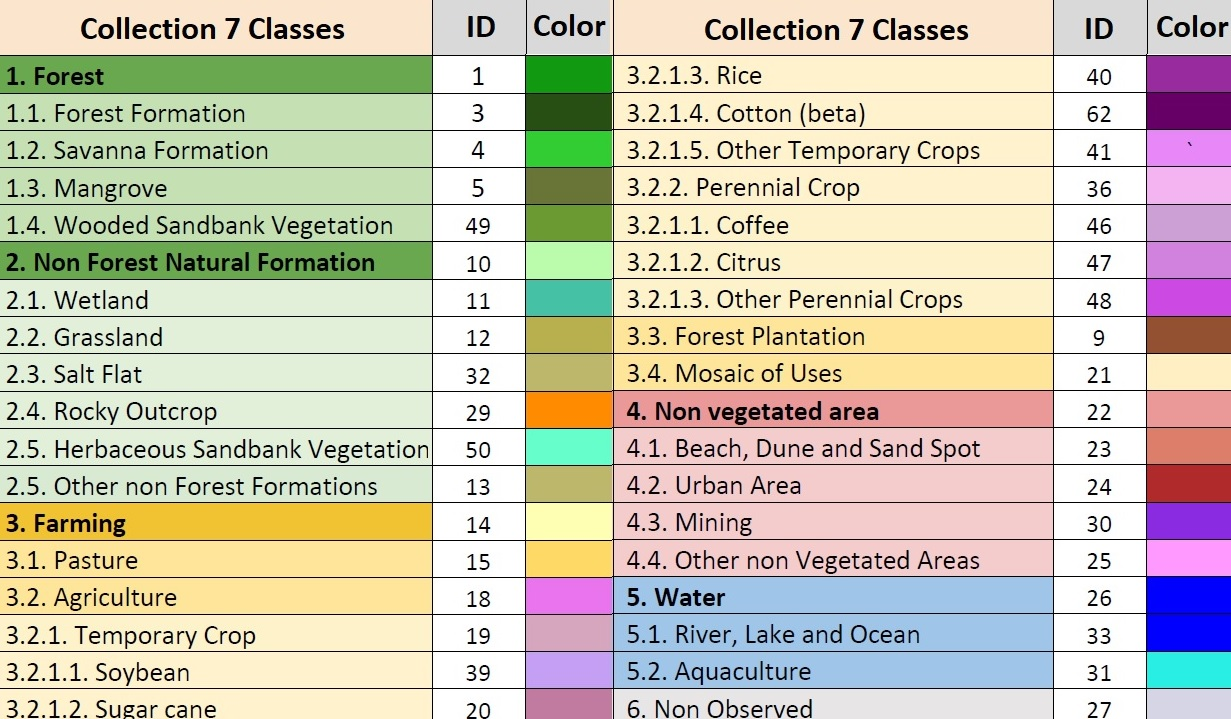

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/files/mapbiomas_legend.jpg', width=800, height=450)

In [ ]:
# Defining and plot the map

# Defining state
match state_name.value:
  case ('Ceará'):
    state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','23'))
  case ('Goiás'):
    state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','52'))
  case ('Mato Grosso'):
    state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','51'))
  case ('Mato Grosso do Sul'):
    state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','50'))
  case ('Minas Gerais'):
    state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','31'))
  case ('Rio Grande do Sul'):
    state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','43'))
  case ('Rondônia'):
    state = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_UF_2022').filter(ee.Filter.eq('CD_UF','11'))

# Defining city
print (city_cod)
city = ee.FeatureCollection('projects/ee-lzfsantos/assets/BR_Municipios_2022').filter(ee.Filter.eq('CD_MUN',str(city_cod)))

# Defining farm
match state_name.value:
  case ('Ceará'):
    farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_se_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
  case ('Goiás'):
    farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_co_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
  case ('Mato Grosso'):
    farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_co_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
  case ('Mato Grosso do Sul'):
    farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_co_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
  case ('Minas Gerais'):
    farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_se_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
  case ('Rio Grande do Sul'):
    farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_s_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))
  case ('Rondônia'):
    farm = ee.FeatureCollection('projects/ee-lzfsantos/assets/rg_n_landtenure_imaflora_201810_sirgas').filter(ee.Filter.eq('id_imovel',farm_cod))

# Mapbiomas layer
map_2021 = mapbiomas.select('classification_2021')

mapbiomas_clip = map_2021.clip(farm)
Map = geemap.Map()
Map.addLayer(state, {}, "State")
Map.addLayer(city, {}, "City")
Map.addLayer(mapbiomas_clip, {'palette':palette_list, 'min':0, 'max':62},'Farm (MapBiomas)')
Map.centerObject(farm,10)
Map

3161403


Map(center=[-20.7824615787301, -42.24201996450432], controls=(WidgetControl(options=['position', 'transparent_…